In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [31]:
#informs us the total count of
count_labels = train_data.iloc[:,2:].sum(axis=1)
print(count_labels)
train_data['cleaned_comments'] = (count_labels==0)
train_data.cleaned_comments

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
159566    0.0
159567    0.0
159568    0.0
159569    0.0
159570    0.0
Length: 159571, dtype: float64


0         True
1         True
2         True
3         True
4         True
          ... 
159566    True
159567    True
159568    True
159569    True
159570    True
Name: cleaned_comments, Length: 159571, dtype: bool

In [6]:
print("Missing values in training data = ")
missing_train = train_data.isnull().sum()
print(missing_train)
print("Missing values in testing data =")
missing_test = test_data.isnull().sum()
print(missing_test)

Missing values in training data = 
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Missing values in testing data =
id              0
comment_text    0
dtype: int64


In [23]:
labels_count = train_data[train_data.columns[2:]].sum()
labels_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

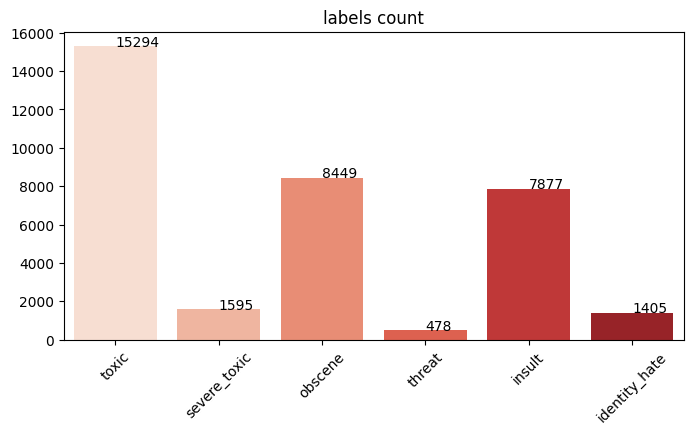

In [21]:
import seaborn as sns
py.figure(figsize=(8,4))
sns.barplot(x= labels_count.index, y = labels_count.values, palette= sns.color_palette("Reds"))
for i in range(len(labels_count)):
  py.text(i,labels_count[i],labels_count.values[i])
py.xticks(rotation=45)
py.title('labels count', fontsize=12)
py.show()

{'this', 'between', 'such', 'theirs', "you'll", "we'll", "shouldn't", 'why', "isn't", "you're", 'too', 'off', 'from', 'about', 'some', 'when', 'www', 'ever', "weren't", 'each', 'not', 'up', 'whom', 'here', 'any', "wasn't", 'more', 'shall', 'only', 'they', 'as', 'hence', 'he', 'these', "why's", 'just', 'what', 'you', 'were', 'get', 'nor', 'having', "didn't", 'over', 'was', 'after', "she'd", 'with', 'him', "shan't", "mustn't", 'at', 'both', 'are', 'through', 'herself', "hadn't", 'then', 'himself', "hasn't", "let's", "you'd", 'that', 'yourself', 'most', 'yours', "here's", 'she', 'same', "she's", "that's", 'the', 'because', 'it', "i'll", "we're", 'there', "what's", 'can', "can't", 'else', "they're", "where's", "we'd", 'all', "i've", 'is', 'them', 'above', "don't", "won't", 'who', "he'd", "aren't", "doesn't", 'k', 'could', "couldn't", 'until', 'have', 'before', 'our', 'doing', 'http', 'out', 'therefore', 'a', 'since', "i'm", 'be', 'would', 'com', 'during', 'my', 'their', 'further', "i'd", "

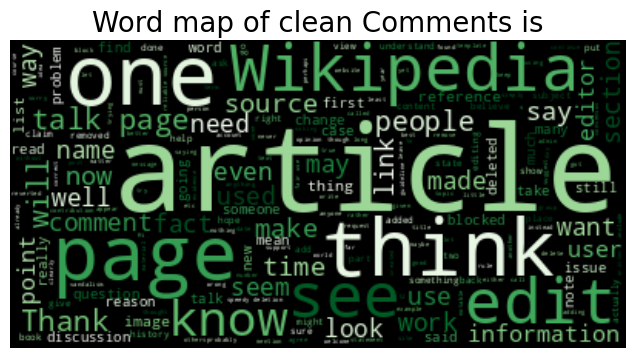

In [42]:
# clean words
from wordcloud import WordCloud ,STOPWORDS
train_subset = train_data[train_data.cleaned_comments==True]
text = " ".join(i for i in train_subset.comment_text)
stopwords = set(STOPWORDS)
print(stopwords)
wordcloud = WordCloud(stopwords=stopwords, colormap="Greens").generate(text)
print(wordcloud)
py.figure( figsize=(8,4))
py.imshow(wordcloud, interpolation='bilinear')
py.axis("off")
py.title("Word map of clean Comments is", fontsize=20)
py.show()

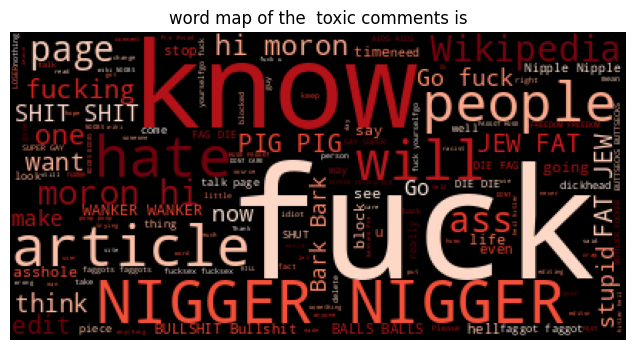

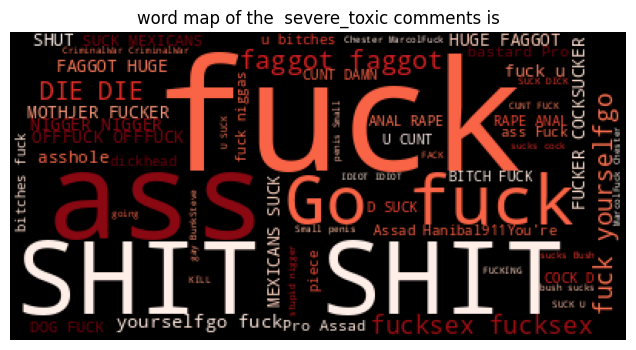

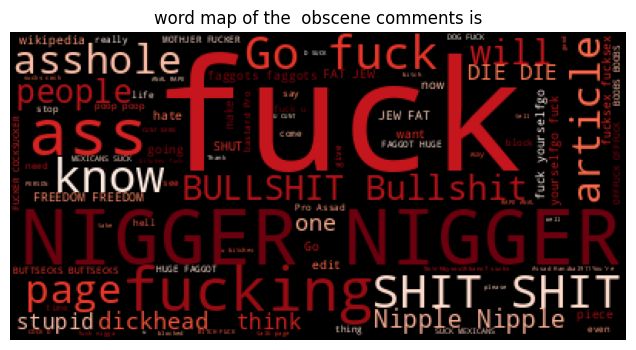

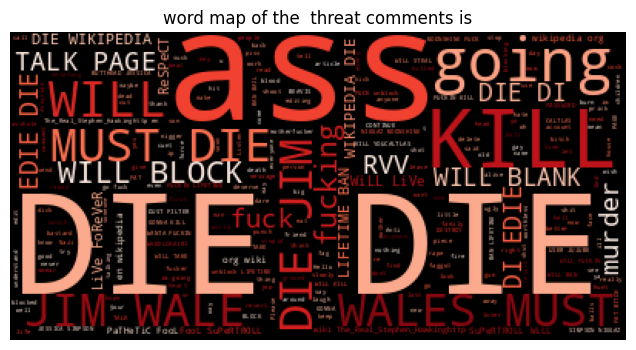

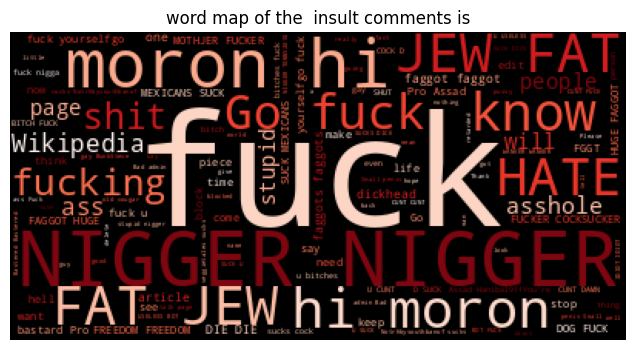

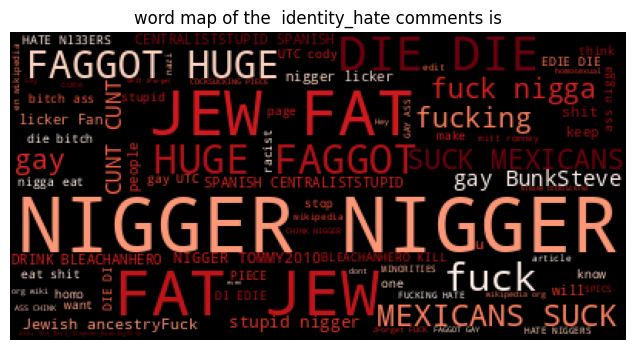

In [41]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for i in labels:
    subset = train_data[train_data[i]==1]
    text = " ".join(j for j in subset.comment_text)
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=500,
        max_font_size=100,
        colormap="Reds"
        ).generate(text)

    fig = py.figure(figsize=(8, 4))
    py.title("word map of the "+" "+i+" "+"comments is")
    py.imshow(wordcloud)
    py.axis('off')
    py.show()